In [1]:
from svm_linear import LinearSvm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from svm_tests import (plot_dataset, print_model_summary, linearSVC_model, SVC_model,
                       my_model, plot_hyperplane, plot_hplanes_comparison, svm_test_2d, svm_test)
%matplotlib inline

### Test 1

Dataset:


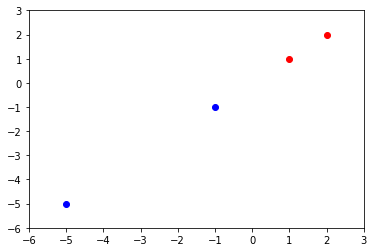

LinearSVC model:
predictions: [ 1 -1  1 -1]
accuracy: 1.0
weights: [ 0.5000001  0.5000001]
bias: [  2.09075158e-07]


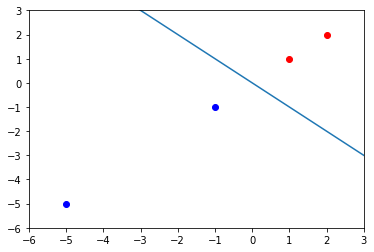

SVC model:
predictions: [ 1 -1  1 -1]
accuracy: 1.0
weights: [ 0.5  0.5]
bias: [-0.]


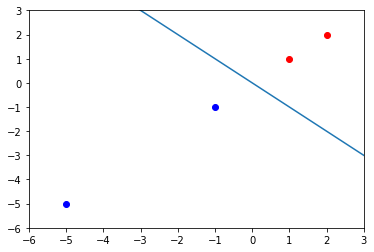

My model:
predictions: [ 1. -1.  1. -1.]
accuracy: 1.0
weights: [ 0.5005005  0.5005005]
bias: [ 0.00059971]


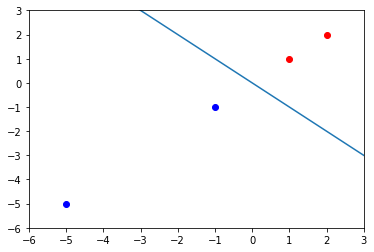

Models Comparison:


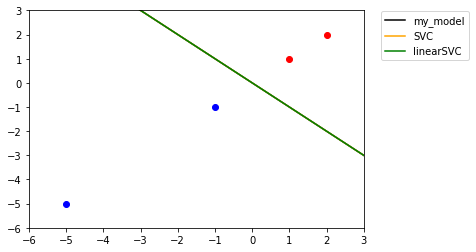

In [2]:
X = np.array([[1,1], [-1,-1], [2,2], [-5,-5]])
y = np.array([1,-1,1,-1])

model_linSVC, model_SVC, model_my = svm_test_2d(X, y, C=1.0)

Let's look at how loss function changes over learning process:

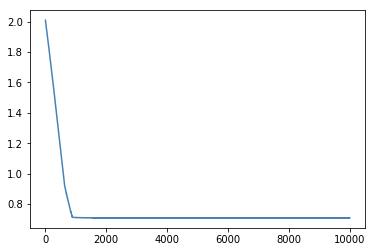

In [3]:
loss = model_my.get_loss_history()
plt.plot(np.arange(len(loss)), loss, color='steelblue')
plt.show()

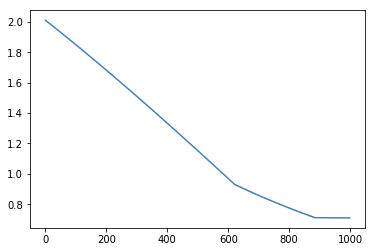

In [4]:
loss = model_my.get_loss_history()
plt.plot(np.arange(1000), loss[:1000], color='steelblue')
plt.show()

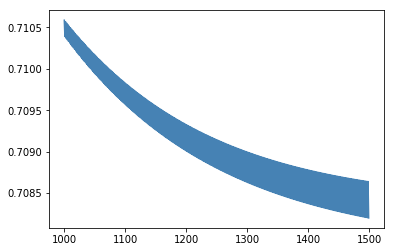

In [5]:
loss = model_my.get_loss_history()
plt.plot(np.arange(1000,1500), loss[1000:1500], color='steelblue')
plt.show()

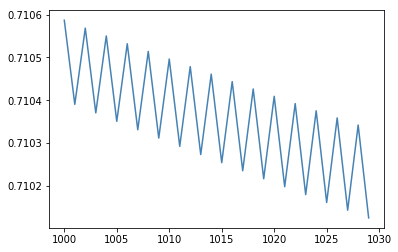

In [6]:
loss = model_my.get_loss_history()
plt.plot(np.arange(1000,1030), loss[1000:1030], color='steelblue')
plt.show()

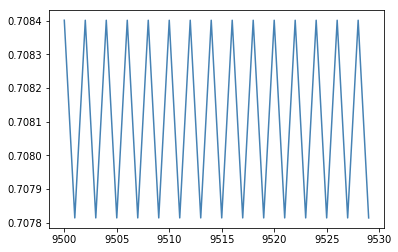

In [7]:
loss = model_my.get_loss_history()
plt.plot(np.arange(9500,9530), loss[9500:9530], color='steelblue')
plt.show()

we can see that near the minimum (global) loss function is going up and down. It means that we can decrease learning_rate or just stop learning at this point.

Let's increase the learning rate to see that similar behavior is obtained but the loss function is greater as we can't approach very precisely the point of the global minimum:

In [8]:
model_my = my_model(X, y, C=1.0, learning_rate=0.01, max_iter=10000, random_seed=1)

My model:
predictions: [ 1. -1.  1. -1.]
accuracy: 1.0
weights: [ 0.50116887  0.49884422]
bias: [-0.00817175]


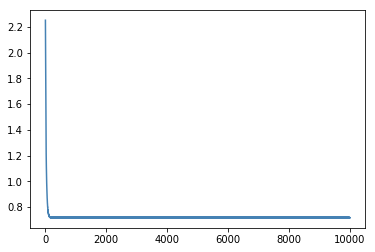

In [9]:
loss = model_my.get_loss_history()
plt.plot(np.arange(len(loss)), loss, color='steelblue')
plt.show()

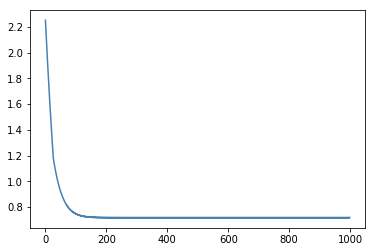

In [10]:
loss = model_my.get_loss_history()
plt.plot(np.arange(1000), loss[:1000], color='steelblue')
plt.show()

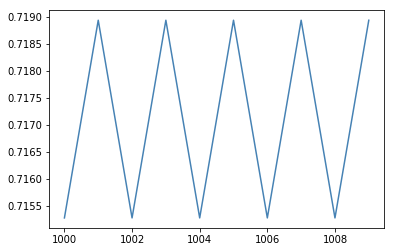

In [11]:
loss = model_my.get_loss_history()
plt.plot(np.arange(1000,1010), loss[1000:1010], color='steelblue')
plt.show()

### Test 2

dataset:

Dataset:


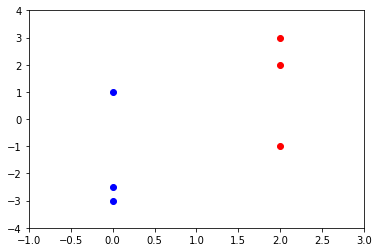

LinearSVC model:
predictions: [ 1 -1  1 -1  1 -1]
accuracy: 1.0
weights: [  9.99965678e-01   2.08625906e-05]
bias: [-0.99993741]


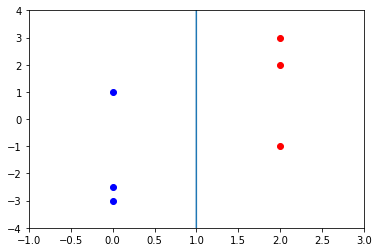

SVC model:
predictions: [ 1 -1  1 -1  1 -1]
accuracy: 1.0
weights: [  9.99856000e-01   1.92000000e-04]
bias: [-0.999744]


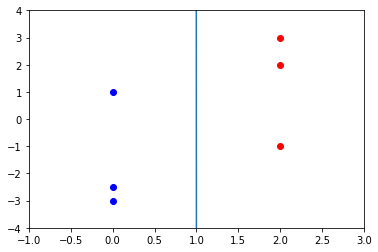

My model:
predictions: [ 1. -1.  1. -1.  1. -1.]
accuracy: 1.0
weights: [  9.99806828e-01   2.10438303e-04]
bias: [-0.99940029]


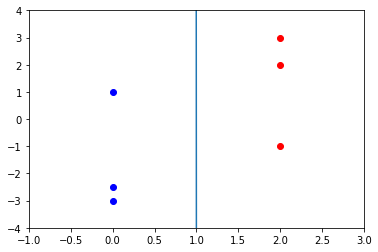

Models Comparison:


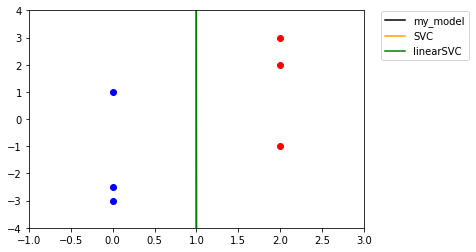

(LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 <svm_linear.LinearSvm at 0x108890a90>)

In [12]:
X = np.array([[2,2], [0,1], [2,3], [0,-3], [2,-1], [0,-2.5]])
y = np.array([1,-1,1,-1,1,-1])

svm_test_2d(X, y)

### Test 3. Fisher's Iris

dataset:

In [13]:
data = datasets.load_iris()

In [14]:
X = data.data
y = data.target

X_class_0 = X[y==0]
X_class_1 = X[y==1]
X_class_2 = X[y==2]

y_class_0 = y[y==0]
y_class_1 = y[y==1]
y_class_2 = y[y==2]

In [15]:
X_temp = np.vstack((X_class_0[:,[1,3]], X_class_1[:,[1,3]]))
y_temp = np.concatenate((y_class_0, y_class_1))

In [16]:
def change_ladels_for_svm(y, label_1, label_2):
    for i in range(len(y)):
        if y[i] == label_1:
            y[i] = -1
        if y[i] == label_2:
            y[i] = +1
    return y

In [17]:
y_changed = change_ladels_for_svm(y_temp, 0, 1)

In [18]:
X = X_temp
y = y_changed

Dataset:


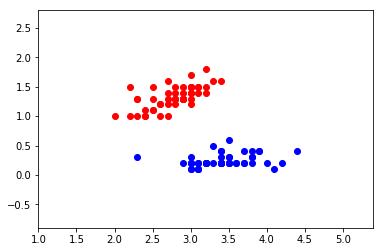

LinearSVC model:
predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
accuracy: 1.0
weights: [-0.69072339  2.26498081]
bias: [ 0.39275531]


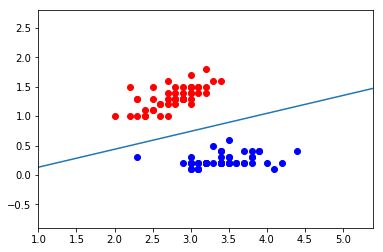

SVC model:
predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
accuracy: 1.0
weights: [-0.98352957  2.01411784]
bias: [ 1.34635397]


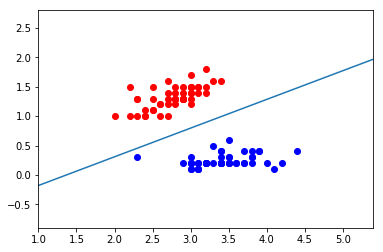

My model:
predictions: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
accuracy: 1.0
weights: [-0.66984414  2.08369905]
bias: [ 0.44259971]


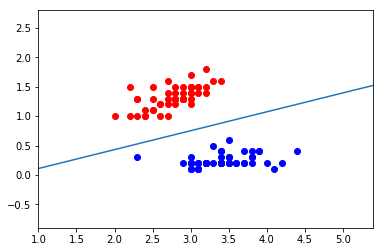

Models Comparison:


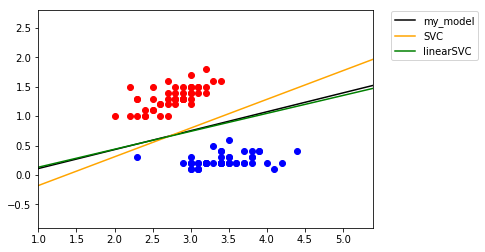

In [20]:
model_linSVC, model_SVC, model_my = svm_test_2d(X, y, C=1.0)

In [21]:
loss = model_my.get_loss_history()

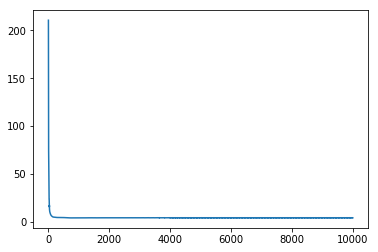

In [22]:
plt.plot(loss)
plt.show()

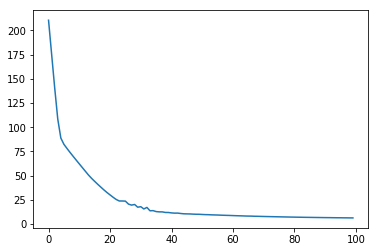

In [23]:
plt.plot(np.arange(100), loss[:100])
plt.show()

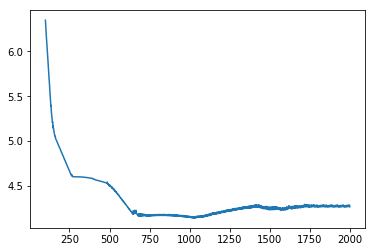

In [24]:
plt.plot(np.arange(100,2000), loss[100:2000])
plt.show()

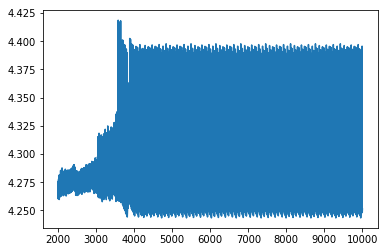

In [25]:
plt.plot(np.arange(2000,10000), loss[2000:10000])
plt.show()

Let's compare svm implementation with stoch gradient learning

Dataset:


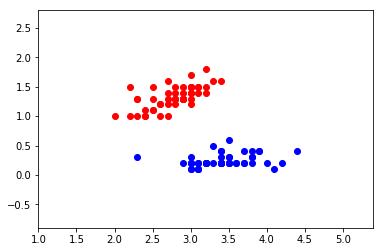

LinearSVC model:
predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
accuracy: 1.0
weights: [-0.69072339  2.26498081]
bias: [ 0.39275531]


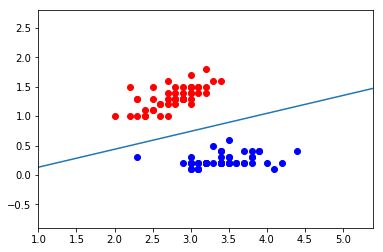

SVC model:
predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
accuracy: 1.0
weights: [-0.98352957  2.01411784]
bias: [ 1.34635397]


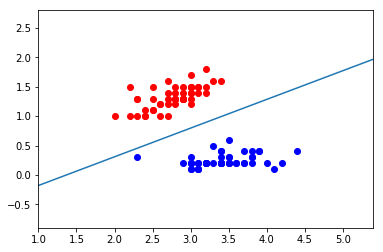

My model:
predictions: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
accuracy: 1.0
weights: [-0.64859586  1.44917258]
bias: [ 0.87259971]


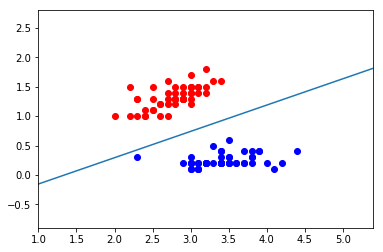

Models Comparison:


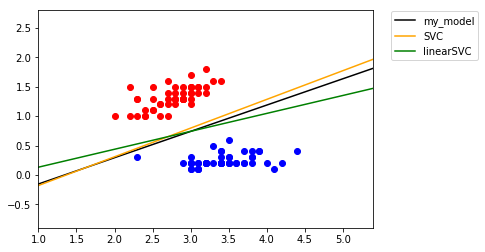

In [26]:
model_linSVC, model_SVC, model_stoch = svm_test_2d(X, y, C=1.0, learning_rate=0.001, max_iter=10000,
                                                random_seed=10, mini_batch_size=10)

In [27]:
loss_stoch = model_stoch.get_loss_history()

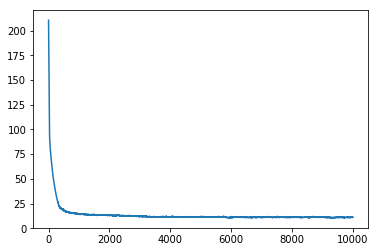

In [28]:
plt.plot(loss_stoch)
plt.show()

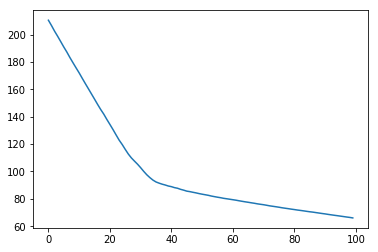

In [29]:
plt.plot(np.arange(100), loss_stoch[:100])
plt.show()

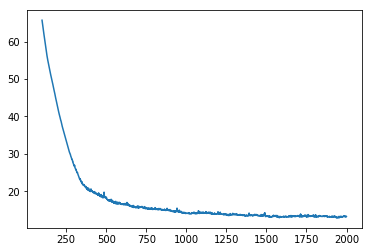

In [30]:
plt.plot(np.arange(100,2000), loss_stoch[100:2000])
plt.show()

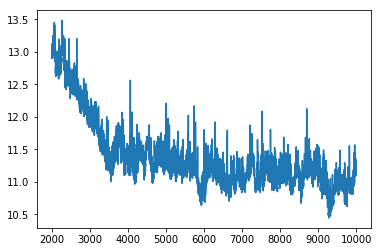

In [31]:
plt.plot(np.arange(2000,10000), loss_stoch[2000:10000])
plt.show()

Full gradient loss and stoch grad loss on the same plot:

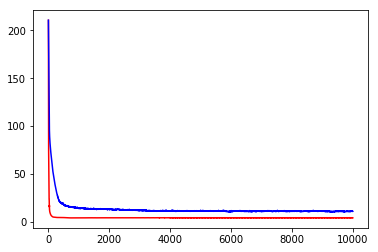

In [32]:
plt.plot(loss, color='r')
plt.plot(loss_stoch, color='b')
plt.show()

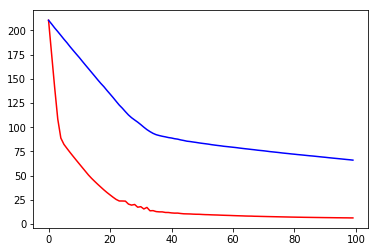

In [33]:
plt.plot(np.arange(100), loss[:100], color='r')
plt.plot(np.arange(100), loss_stoch[:100], color='b')
plt.show()

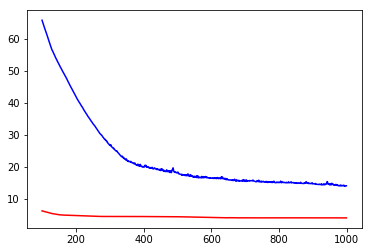

In [34]:
plt.plot(np.arange(100, 1000), loss[100:1000], color='r')
plt.plot(np.arange(100, 1000), loss_stoch[100:1000], color='b')
plt.show()

### Test 4. Not linearly separable dataset (random generated)

In [35]:
np.random.seed(1)
X = np.random.randn(30,2)
y = np.random.randint(0,2,30)
y = change_ladels_for_svm(y, 0, 1)
print('Number of positive samples:', len(y[y==1]))
print('NUmber of negative samples:', len(y[y==-1]))

Number of positive samples: 9
NUmber of negative samples: 21


Dataset:


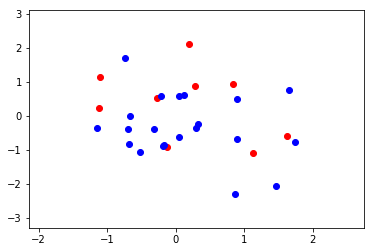

LinearSVC model:
predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
accuracy: 0.7
weights: [  2.95923706e-07   3.15389763e-06]
bias: [-0.99999976]


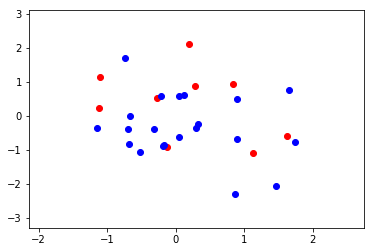

SVC model:
predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
accuracy: 0.7
weights: [ 0.00037917  0.00057695]
bias: [-0.99973241]


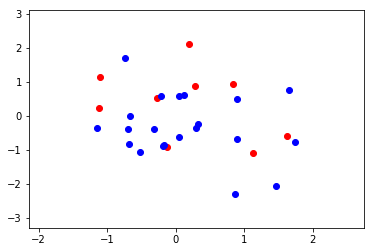

My model:
predictions: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
accuracy: 0.7
weights: [ 0.00080537  0.00507698]
bias: [-0.99740029]


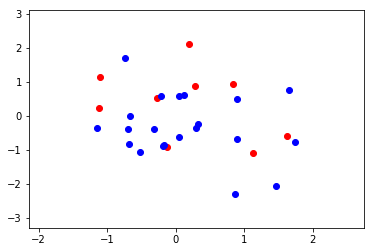

Models Comparison:


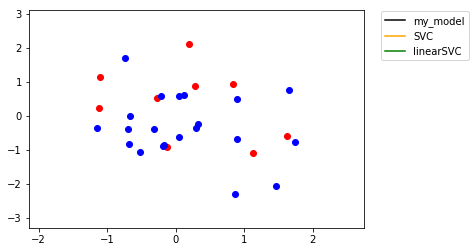

In [36]:
model_linSVC, model_SVC, model_stoch = svm_test_2d(X, y, C=1.0, learning_rate=0.001, max_iter=10000,
                                                random_seed=10, mini_batch_size=None)

Model with stoch grad learning is the following:

Dataset:


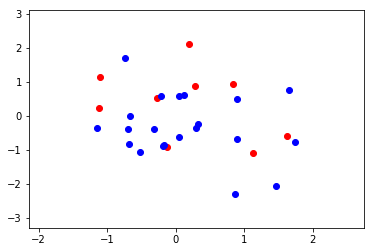

LinearSVC model:
predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
accuracy: 0.7
weights: [ -7.77960291e-06   1.28834738e-05]
bias: [-0.99999665]


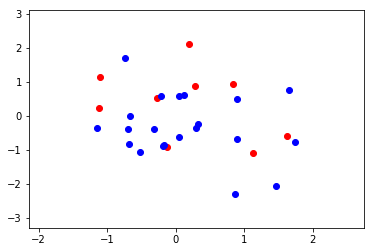

SVC model:
predictions: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]
accuracy: 0.7
weights: [ 0.00037917  0.00057695]
bias: [-0.99973241]


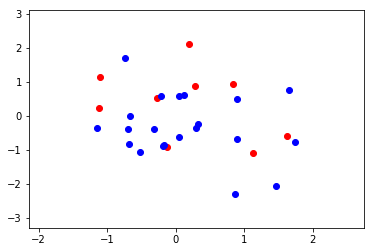

My model:
predictions: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1.]
accuracy: 0.633333333333
weights: [ 0.22633198  0.58412405]
bias: [-0.26340029]


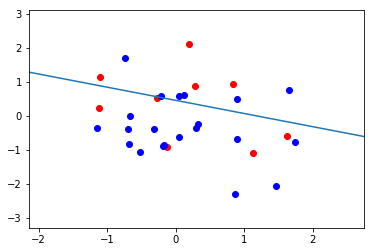

Models Comparison:


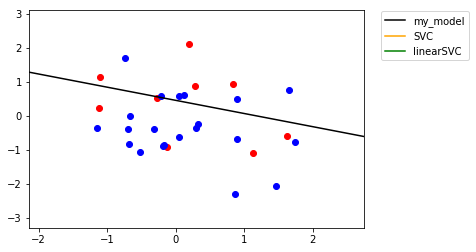

In [37]:
model_linSVC, model_SVC, model_stoch = svm_test_2d(X, y, C=1.0, learning_rate=0.001, max_iter=10000,
                                                random_seed=10, mini_batch_size=10)

### Test 5.

In [38]:
data = datasets.load_breast_cancer()

X = data.data
print('Data matrix shape:', X.shape)
y = data.target
print('labels vector shape:', y.shape)

Data matrix shape: (569, 30)
labels vector shape: (569,)


In [39]:
print(set(y))

{0, 1}


In [40]:
y = change_ladels_for_svm(y, 0, 1)

full grad

In [90]:
model_linSVC, model_SVC, model_my = svm_test(X, y, C=1.0, learning_rate=0.0000001, max_iter=100000,
                                                random_seed=10, random_state=7, mini_batch_size=None, brief=True)

LinearSVC model:
accuracy: 0.715289982425
SVC model:
accuracy: 0.966608084359
My model:
accuracy: 0.905096660808


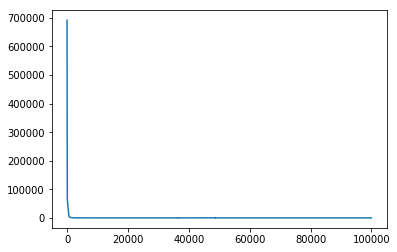

In [91]:
loss = model_my.get_loss_history()
plt.plot(loss)

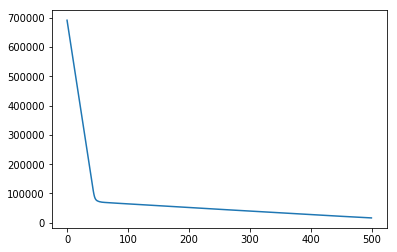

In [93]:
plt.plot(np.arange(500), loss[:500])

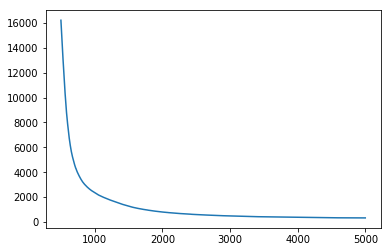

In [96]:
plt.plot(np.arange(500,5000), loss[500:5000])

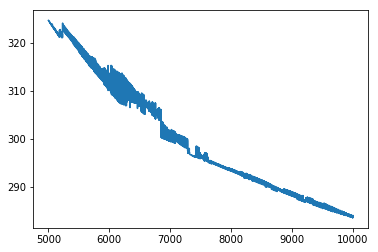

In [97]:
plt.plot(np.arange(5000,10000), loss[5000:10000])

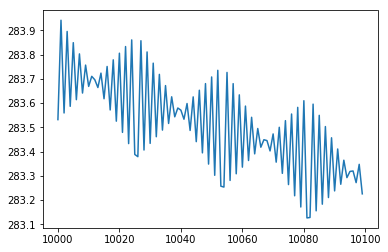

In [99]:
plt.plot(np.arange(10000,10100), loss[10000:10100])

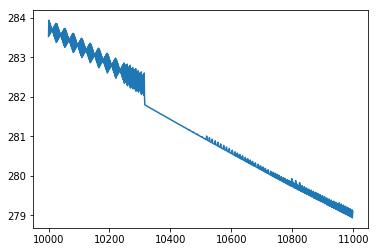

In [100]:
plt.plot(np.arange(10000,11000), loss[10000:11000])

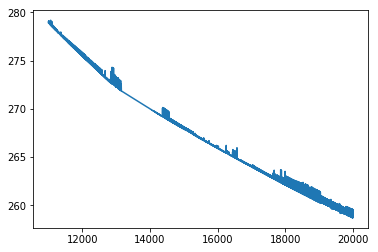

In [103]:
plt.plot(np.arange(11000,20000), loss[11000:20000])

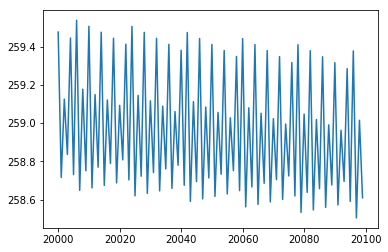

In [104]:
plt.plot(np.arange(20000,20100), loss[20000:20100])

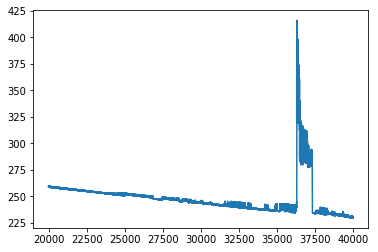

In [106]:
plt.plot(np.arange(20000,40000), loss[20000:40000])

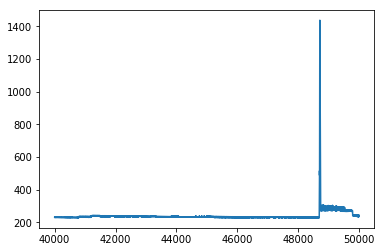

In [109]:
plt.plot(np.arange(40000,50000), loss[40000:50000])

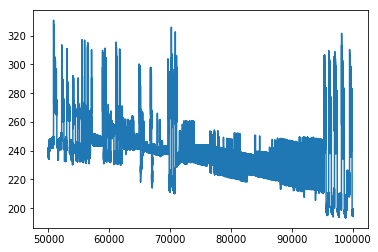

In [112]:
plt.plot(np.arange(50000,100000), loss[50000:100000])

In [133]:
model_linSVC, model_SVC, model_my = svm_test(X, y, C=1.0, learning_rate=0.001, max_iter=100,
                                                random_seed=10, random_state=None, mini_batch_size=None, brief=True)

LinearSVC model:
accuracy: 0.931458699473
SVC model:
accuracy: 0.966608084359
My model:
accuracy: 0.898066783831


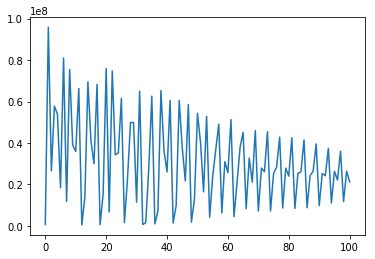

In [134]:
loss = model_my.get_loss_history()
plt.plot(loss)

In [135]:
model_my.loss_min

485031.92972212331

In [145]:
model_linSVC, model_SVC, model_my = svm_test(X, y, C=1.0, learning_rate=0.001, max_iter=100,
                                                random_seed=10, random_state=None, mini_batch_size=None, brief=True)

LinearSVC model:
accuracy: 0.927943760984
SVC model:
accuracy: 0.966608084359
My model:
accuracy: 0.898066783831


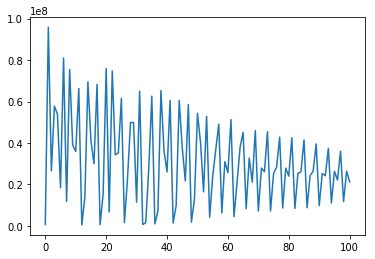

In [146]:
loss = model_my.get_loss_history()
plt.plot(loss)

In [147]:
model_my.loss_min

485031.92972212331

In [148]:
model_linSVC, model_SVC, model_my = svm_test(X, y, C=1.0, learning_rate=0.001, max_iter=10000,
                                                random_seed=10, mini_batch_size=None, brief=True)

LinearSVC model:
accuracy: 0.927943760984
SVC model:
accuracy: 0.966608084359
My model:
accuracy: 0.898066783831


In [149]:
loss = model_my.get_loss_history()

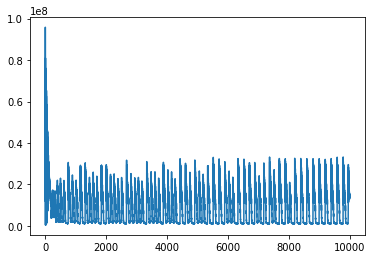

In [150]:
plt.plot(loss)

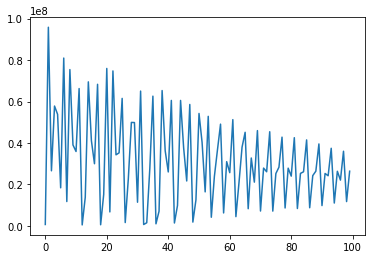

In [151]:
plt.plot(np.arange(100), loss[:100])

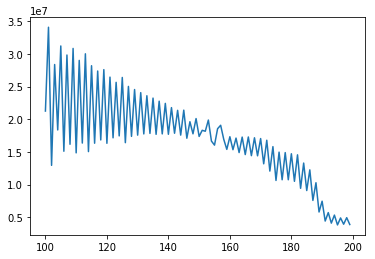

In [152]:
plt.plot(np.arange(100,200), loss[100:200])

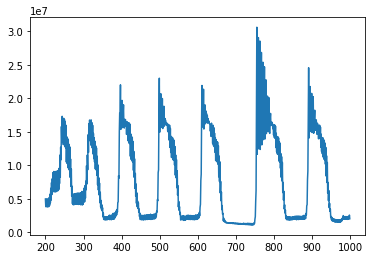

In [153]:
plt.plot(np.arange(200,1000), loss[200:1000])

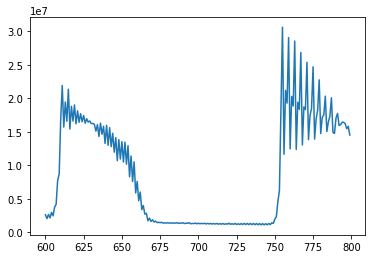

In [154]:
plt.plot(np.arange(600,800), loss[600:800])

stoch grad

In [140]:
model_linSVC, model_SVC, model_my = svm_test(X, y, C=1.0, learning_rate=0.0001, max_iter=1000,
                                                random_seed=10, random_state=7, mini_batch_size=20, brief=True)

LinearSVC model:
accuracy: 0.715289982425
SVC model:
accuracy: 0.966608084359
My model:
accuracy: 0.917398945518


In [141]:
loss = model_my.get_loss_history()

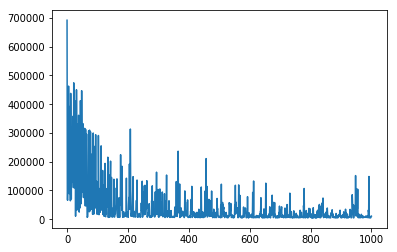

In [142]:
plt.plot(loss)